# Jimmy Wrangler, Data Explorer (Assignment # 01) EECS -731
---

**Quick Note:** Some content of this assignment and my assignment # 03 (Weekend Movie Trip) notebook will be similar, as I have used the same datasets for both assignments.

For this assignment, I took three datasets from the MovieLens Website (https://grouplens.org/datasets/movielens/), namely **Movies, Ratings, and Tags datasets**. First, we do exploratory analysis on each dataset separately, followed by cleaning and merging (those datasets into one) process.

In [1]:
%%time

# Importing the required modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Render out plots inline
%matplotlib inline

CPU times: user 969 ms, sys: 307 ms, total: 1.28 s
Wall time: 4.5 s


# Movies Dataset Analysis
---

In [2]:
movies_ds = pd.read_csv ("../data/movies.csv", dtype = {"movieId": np.int32}, encoding = 'UTF-8')
movies_ds.head ()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
print ("Movies Dataset Basic Insights:")
print ("Unique Movies : ", len(movies_ds['movieId'].unique()))
updated_movies_df = movies_ds.drop ('genres', axis = 1)

Movies Dataset Basic Insights:
Unique Movies :  9742


As shown above, the movies csv file contains total **9724** unique movies. Consequenly, from the table, it is evident that it provides movies names and their **genre**. We can use the **genre** and **title** features for data modeling purpose (e.g. Clustering similar movies together).

# Ratings Dataset Analysis
---

In [11]:
from datetime import datetime

def dateparse (time_in_secs):    
    return datetime.fromtimestamp (float (time_in_secs))

rating_df = pd.read_csv ("../data/ratings.csv", parse_dates = ["timestamp"], date_parser = dateparse, dtype = {"userId": np.int32, "movieId": np.int32, "rating": np.float32}, encoding = 'UTF-8')
rating_df.head ()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 13:45:03
1,1,3,4.0,2000-07-30 13:20:47
2,1,6,4.0,2000-07-30 13:37:04
3,1,47,5.0,2000-07-30 14:03:35
4,1,50,5.0,2000-07-30 13:48:51


In [12]:
print ("Ratings Dataset Basic Insights:")
print ("Unique Users : ", len(rating_df ['userId'].unique ()))
print ("Unique Movies : ", len(rating_df['movieId'].unique()))
updated_ratings_df = rating_df.drop('timestamp', axis = 1)

Ratings Dataset Basic Insights:
Unique Users :  610
Unique Movies :  9724


As seen above, **610** users participated in movie ratings for **9724** unique movies. This dataset also has timestamp that may be useful in time based analysis or modeling. But for this assignment, for merging process later, I dropped this feature being not useful (as part of **feautre engineering/cleaning process**).

# Tags Dataset Analysis
---

In [13]:
tag_df = pd.read_csv ("../data/tags.csv", parse_dates = ["timestamp"], date_parser = dateparse, dtype = {"userId": np.int32, "movieId": np.int32}, encoding = 'UTF-8')
tag_df.head ()

,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-24 14:29:54
1,2,60756,Highly quotable,2015-10-24 14:29:56
2,2,60756,will ferrell,2015-10-24 14:29:52
3,2,89774,Boxing story,2015-10-24 14:33:27
4,2,89774,MMA,2015-10-24 14:33:20


In [14]:
tag_df ['tag'] = tag_df ['tag'].str.lower ().str.replace (' ', '').str.replace ('-', '')
tag_df.head ()
tag_df.shape

(3683, 4)

In [15]:
print ("Tags Dataset Basic Insights:")
print ("Unique Users : ", len (tag_df ['userId'].unique ()))
print ("Unique Movies : ", len (tag_df ['movieId'].unique ()))
print ("Unique Tags : ", len (tag_df ['tag'].unique ()))
updated_tag_df = tag_df.drop ('timestamp', axis = 1)

Tags Dataset Basic Insights:
Unique Users :  58
Unique Movies :  1572
Unique Tags :  1460


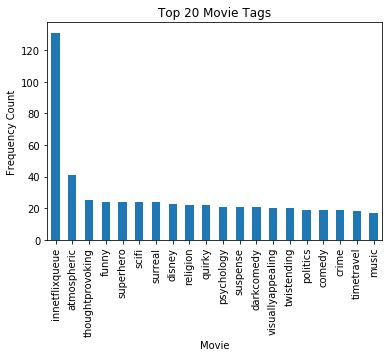

In [16]:

plt.title('Top 20 Movie Tags')
plt.xlabel('Movie')
plt.ylabel('Frequency Count')
updated_tag_df ['tag'].value_counts()[:20].plot(kind='bar')
plt.show()


The tag dataset csv file contains tags that are given by the users to different movies. As shown above, **1572 (out of total 9724)** movies have been given total **1460** tags or keywords by **58 (out of total 610)** unique and different users. The tag feature assigned to different movies can be used again for different data modeling tasks (e.g. Clustering based modeling).

# Datsets Feature Engineering and Merging Process

Next, we are merging different datapoints into single dataset that can be used for further process (e.g. Data Modeling for classification, clustering or regression purpose).

First, we **merge** *movies* and *ratings* data frames based on common *movieId* feature, followed by merging the resultant table with tags table based on *movieId* and *userId* featues.

In [17]:
# Merging into a single dataset
#updated_ratings_df = updated_ratings_df.drop ('timestamp', axis = 1)
database = updated_movies_df.merge (updated_ratings_df, on = 'movieId', how = 'left')
database = database.merge (updated_tag_df, on = ['movieId', 'userId'], how = 'left')
database.head ()

,movieId,title,userId,rating,tag
0,1,Toy Story (1995),1.0,4.0,NaN
1,1,Toy Story (1995),5.0,4.0,NaN
2,1,Toy Story (1995),7.0,4.5,NaN
3,1,Toy Story (1995),15.0,2.5,NaN
4,1,Toy Story (1995),17.0,4.5,NaN


As we can see that there are some NaN values in the resultant table. So, we **drop** rows with any NaN value. 

In [18]:
#dropping NaN based values
cleaned_df = database.dropna()

print ("Shapes Basic Insight:")
print ("Merged Data Frame : ", database.shape)
print ("Cleaned Data Frame : ", cleaned_df.shape)

cleaned_df.tail ()

Shapes Basic Insight:
Merged Data Frame :  (102695, 5)
Cleaned Data Frame :  (3476, 5)


,movieId,title,userId,rating,tag
102653,187595,Solo: A Star Wars Story (2018),62.0,4.0,starwars
102682,193565,Gintama: The Movie (2010),184.0,3.5,anime
102683,193565,Gintama: The Movie (2010),184.0,3.5,comedy
102684,193565,Gintama: The Movie (2010),184.0,3.5,gintama
102685,193565,Gintama: The Movie (2010),184.0,3.5,remaster


In [19]:
print ("Merged and Finally Cleaned DataFrame Basic Insights:")
print ("Unique Users : ", len (cleaned_df['userId'].unique ()))
print ("Unique Movies : ", len (cleaned_df['movieId'].unique()))
print ("Unique Tags : ", len(cleaned_df['tag'].unique()))

Merged and Finally Cleaned DataFrame Basic Insights:
Unique Users :  54
Unique Movies :  1464
Unique Tags :  1424


Consequently, number of row are reduced from *1,02,695* to just *3,476* rows, but more cleaner and ready to be used by data modeling process. This final table can be used for any modeling purpose, especially for Cluster based recommendation system. I have also given the clustering process as follows, which is not required by the given assignment,thus, optional part that can be skipped/ignored.

# Conclusion

This was the basic data science assignment, but, I believe this was the **most important data science asignment**. Because data cleaning/ feature engineering process is vital before doing any data modeling stuff. As there is a famous term in data science and machine/deep learning community for importance of data pre-processing, i.e. GIGO (Garbage In, Garbage Out). So, in my opinion, this assingment was very important and useful for me to understand the baseics of data pre-processing. So, first we loaded three separate datasets, followed by merging them into a single table based on some common features/fields. Along the way, we also did cleaning/feature engineering on these tables e.g. Dropping NaN values.

## One Application/Usage of above Data Processing: Clustering based Recommendation System (optional, copied from my Assignment # 03 submission)
---
To group similar movies and recommend movies to the users, I am using RATINGS and TAGS features that are really helpful for such recommendation system. So, once we get the clusters/groups, then we can recommend *similar movies* using those clusters. So, the k-means algorithm is being used for clustering simiar movies together. The input to the alogrithm would be movies vector of tags and ratings. Consequently, k-means will cluster the similar movies together. 

## Preparing Tags from the Tags Dataset
---
First, I create the *tags vectors* to be used for clustering process later on.

In [15]:
mov_tag_df = cleaned_df.groupby ('movieId').agg ({'tag':lambda x: ' '.join (x),'rating':max}).reset_index ()
mov_tag_df.head ()
rec_database = mov_tag_df.merge (updated_movies_df, on = 'movieId', how = 'left')
rec_database.head ()

,movieId,rating,tag,title
0,1,4.0,pixar pixar fun,Toy Story (1995)
1,2,4.0,fantasy magicboardgame robinwilliams game,Jumanji (1995)
2,3,2.5,moldy old,Grumpier Old Men (1995)
3,5,1.5,pregnancy remake,Father of the Bride Part II (1995)
4,7,3.0,remake,Sabrina (1995)


,movieId,tag,rating,title
0,1,pixar pixar fun,4.0,Toy Story (1995)
1,2,fantasy magicboardgame robinwilliams game,4.0,Jumanji (1995)
2,3,moldy old,2.5,Grumpier Old Men (1995)
3,5,pregnancy remake,1.5,Father of the Bride Part II (1995)
4,7,remake,3.0,Sabrina (1995)


# The K-means Clustering Process

**Next, we start fitting the k-means algorithm process to cluster similar movies together.**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer (stop_words='english')
X = vectorizer.fit_transform (mov_tag_df ['tag'])

In [17]:
model = KMeans (n_clusters = 100, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit (X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=100, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

One we have the clusters, then let's examine the 10 clusters for top or dominant words in them.

In [23]:
print ("Top terms/words per cluster:\n")
order_centroids = model.cluster_centers_.argsort ()[:, ::-1]
terms = vectorizer.get_feature_names ()
for i in range (10):
    print ("Cluster : ",str(i+1)),
    for ind in order_centroids [i, :5]:
        print (' %s' % terms [ind],)
    print("\n\n")

Top terms/words per cluster:

Cluster :  1
 india
 girlpower
 cinematography
 england
 surreal



Cluster :  2
 stephenking
 prom
 highschool
 firefly
 fathersonrelationship



Cluster :  3
 politics
 president
 africa
 business
 fbi



Cluster :  4
 journalism
 zooeydeschanel
 fbi
 fantasyworld
 farfetched



Cluster :  5
 innetflixqueue
 televangelist
 courtroomdrama
 janeausten
 biopic



Cluster :  6
 ghosts
 iseedeadpeople
 brucewillis
 stylized
 imdbtop250



Cluster :  7
 disney
 nanny
 kingarthur
 fish
 heartwarming



Cluster :  8
 superhero
 amyadams
 marvel
 hughjackman
 comicbook



Cluster :  9
 police
 drugs
 murder
 innetflixqueue
 action



Cluster :  10
 quirky
 zooeydeschanel
 family
 fantasyworld
 farfetched





## Qualitative Check on k-means based Clusters

As shown above, all clusters have words that have almost same semantic representation and have some kind of string correlation with each other. For example, the **cluster # 08** has following terms:

**Cluster 8:  superhero amyadams marvel hughjackman comicbook**

As seen above, these terms  are really close to each other, if we look for relevancy and semantic context. So, I believe that our clustering process gives reasonable results with producing qood quality clusters or groups.

Let's predict the similarity for the input keywords *fantasy magicboardgame robinwilliams game*:

In [24]:
prediction = model.predict (vectorizer.transform (["fantasy magicboardgame robinwilliams game"]))
print (prediction)

[24]


In [25]:
rec_database ['cluster'] = model.predict (vectorizer.transform (rec_database ['tag']))
rec_database.head ()

,movieId,rating,tag,title,cluster
0,1,4.0,pixar pixar fun,Toy Story (1995),24
1,2,4.0,fantasy magicboardgame robinwilliams game,Jumanji (1995),24
2,3,2.5,moldy old,Grumpier Old Men (1995),24
3,5,1.5,pregnancy remake,Father of the Bride Part II (1995),99
4,7,3.0,remake,Sabrina (1995),33


As shown above, the clustering process is giving quite effective results.

Next, we see **similar/recommended movies groups**, based on the above clustering process:

In [26]:
recommended_movies_df = rec_database.groupby ('cluster').agg ({'title':lambda x: ', '.join (x)}).reset_index ()
recommended_movies_df

,cluster,title
0,0,"Little Princess, A (1995), Song of the Little ..."
1,1,"Dolores Claiborne (1995), Stand by Me (1986), ..."
2,2,"American President, The (1995), Nixon (1995), ..."
3,3,"To Die For (1995), Up Close and Personal (1996..."
4,4,"Persuasion (1995), Crumb (1994), Eat Drink Man..."
5,5,"Sixth Sense, The (1999)"
6,6,"Lion King, The (1994), Aladdin (1992), Snow Wh..."
7,7,"Batman Forever (1995), Batman (1989), Batman R..."
8,8,"Thin Blue Line, The (1988), L.A. Confidential ..."
9,9,"Moonrise Kingdom (2012), History of Future Fol..."
